# The dataset used is for the Intentional Homicide Rate in Different Countries

### Importing Libaries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [51]:
df= pd.read_csv('C:/Users/12367/Documents/Python Scripts/countries-by-intentional-homicide-rate.csv')
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


### Checking for Null Values

In [52]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [53]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB


### The Count By Region

Text(0.5, 1.0, 'The trend of Count by different Regions')

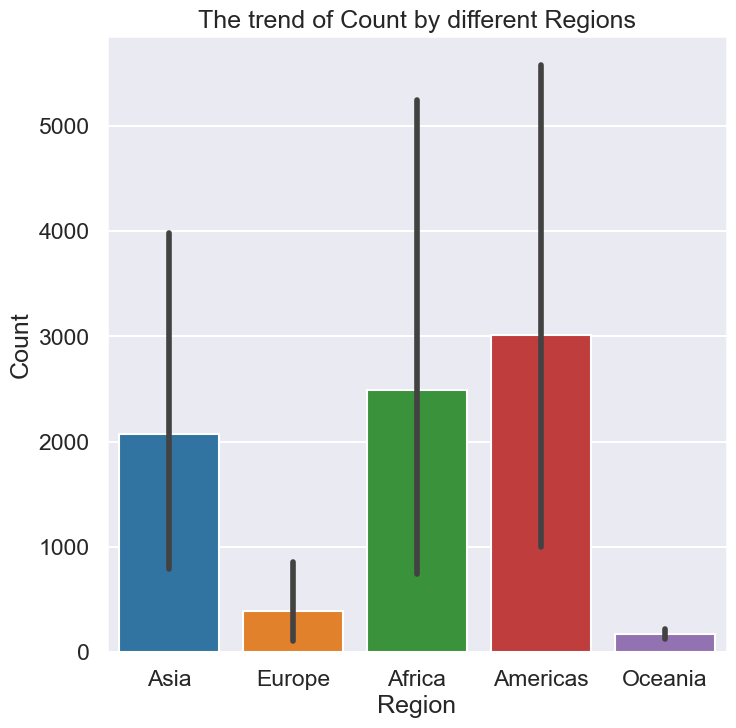

In [55]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(8,8))
b = sns.barplot(data=df, x='Region', y='Count')
plt.title('The trend of Count by different Regions')

### Top 5 Locations by Count 

Text(0.5, 1.0, 'Top 5 Locations by Count')

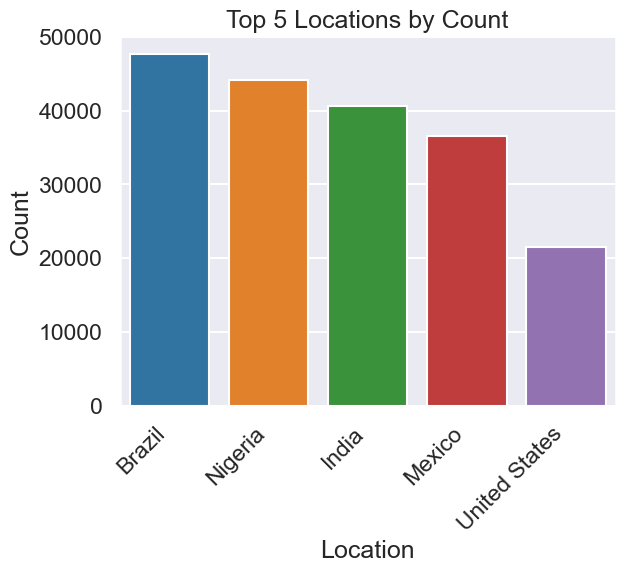

In [56]:
sns.set_style('darkgrid')
sns.set_context('talk')
df_count = df.sort_values(by='Count', ascending=False)
top_5 = df_count.head(5)

c = sns.barplot(data=top_5, x='Location', y='Count')
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Locations by Count')

### Top 5 Locations by Rate

Text(0.5, 1.0, 'Top 5 Locations by Rate')

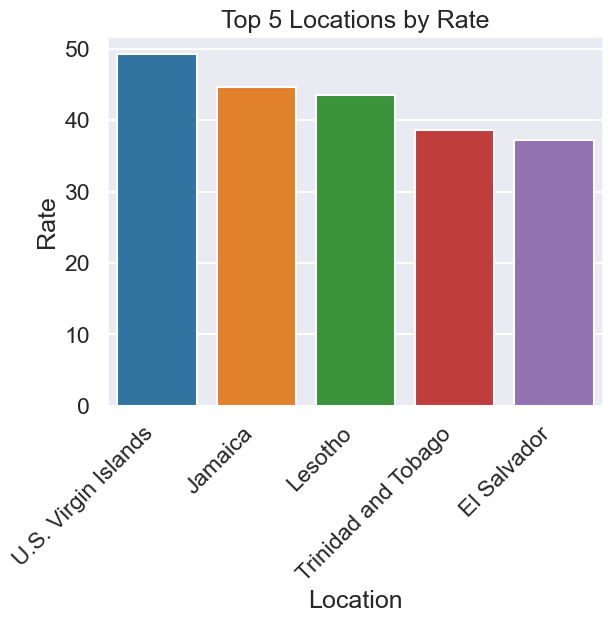

In [57]:
sns.set_style('darkgrid')
sns.set_context('talk')
df_rate = df.sort_values(by='Rate', ascending=False)
top_5_rate = df_rate.head(5)

d = sns.barplot(data=top_5_rate, x='Location', y='Rate')
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Locations by Rate')

### The Trend of Rate over the years

Text(0.5, 1.0, 'The Trend of Rate over the Years')

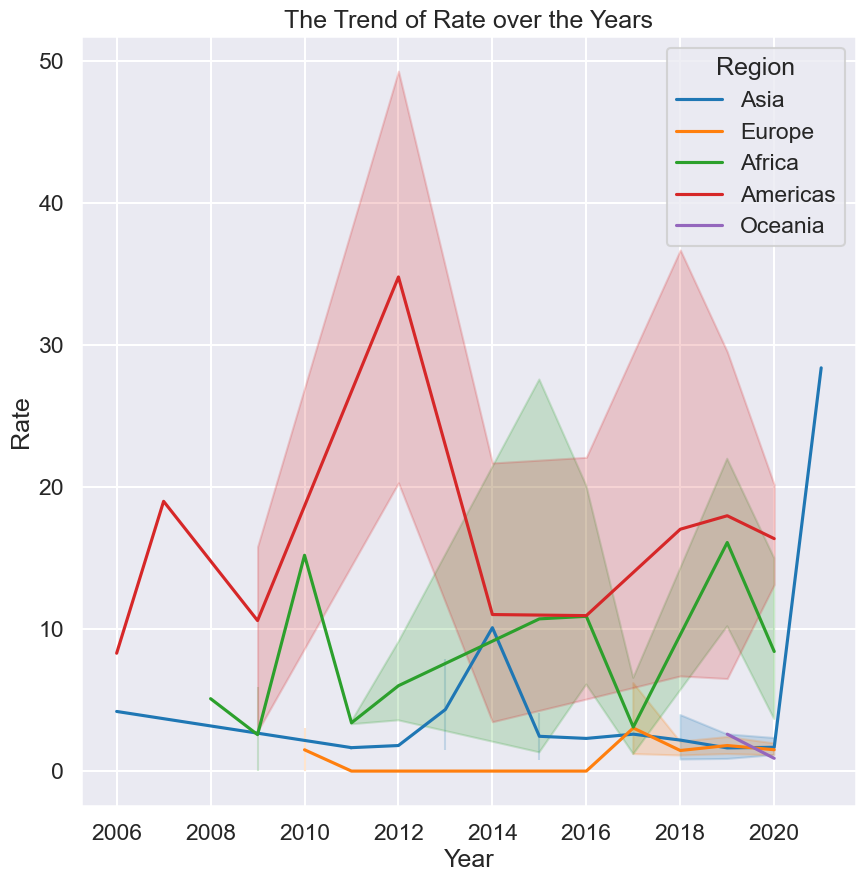

In [58]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(10,10))
a = sns.lineplot(x='Year', y='Rate', data=df, hue='Region')
plt.title('The Trend of Rate over the Years')


## Lets create a piviot table for the Years as Columns and Region as index and Rate as the values.
#### We will use the following table to plot a regplot for the rate

In [59]:
df_for_p = df[['Year', 'Region', 'Rate', 'Count']]
df_for_p.head()

,Year,Region,Rate,Count
0,2018,Asia,6.7,2474
1,2020,Europe,2.1,61
2,2020,Africa,1.3,580
3,2020,Europe,2.6,2
4,2012,Africa,4.8,1217


In [60]:
df_for_p = df_for_p.drop_duplicates(subset=['Year', 'Region'])

df_p  = df_for_p.pivot(index='Region', columns='Year', values='Rate')
df_p.fillna(0, inplace=True)
df_p.head()

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Region,,,,,,,,,,,,,,,,
Africa,0.0,0.0,5.1,5.9,15.2,3.5,4.8,0.0,0.0,43.6,6.1,1.1,0.0,22.0,1.3,0.0
Americas,8.3,19.0,0.0,13.2,0.0,0.0,20.3,0.0,28.3,0.0,5.0,0.0,6.7,0.0,9.2,0.0
Asia,4.2,0.0,0.0,0.0,0.0,1.8,1.8,0.5,10.1,0.8,2.3,2.6,6.7,0.1,1.8,28.4
Europe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7,2.4,2.4,2.1,0.0
Oceania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.6,0.9,0.0


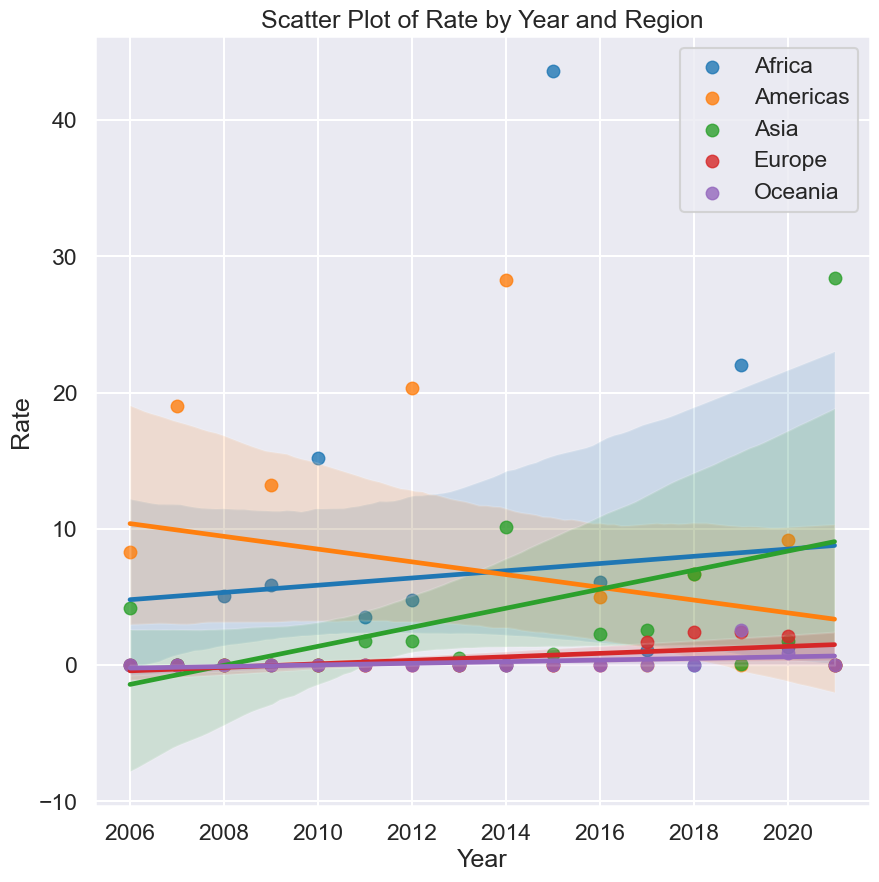

In [61]:
plt.figure(figsize=(10, 10))

for region in regions:
    sns.regplot(x=years, y=df_p.loc[region], label=region)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Scatter Plot of Rate by Year and Region')

# Add a legend
plt.legend()

# Show the plot
plt.show()